In [29]:
# Install the statmodel package
!pip install statsmodels

# Import necessary libraries to perform linear regression
import numpy as np
import pandas as pd

# Libraries for visualising the linear regression.
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [41]:
reviews = pd.read_csv('turtle_reviews.csv')

In [43]:
reviews.head

<bound method NDFrame.describe of       gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     

In [32]:
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [45]:
reviews.info

<bound method DataFrame.info of       gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     ed

In [46]:
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [34]:
# Checking for missing values 
if reviews.isnull().values.any():
    print("There are missing values in the dataframe.")
else:
    print("There are no missing values in the dataframe.")

There are no missing values in the dataframe.


In [35]:
# Viewing the column names
print(reviews.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')


In [36]:
# Removing unwanted columns 
reviews = reviews.drop(columns=['language', 'platform'])

In [37]:
# Checking if the column names have been removed 
print(reviews.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


In [60]:
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


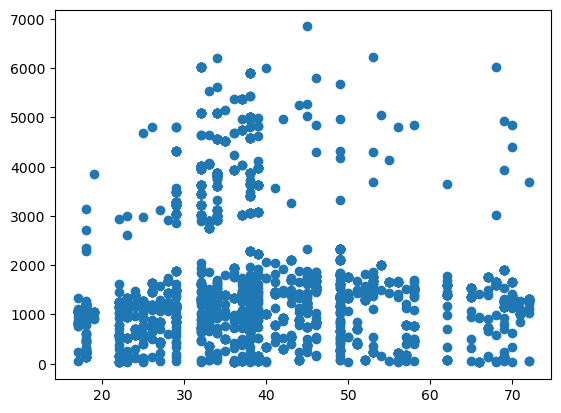

In [47]:
# Define the dependent variable
y = reviews['loyalty_points']

# Define the independent varibale 
x = reviews['age']

# Checking the linearity with matplotlib
plt.scatter(x, y)

In [56]:
reviews.corr()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
age,1.000000,-0.005708,-0.224334,-0.042445,0.003081
remuneration (k£),-0.005708,1.000000,0.005612,0.616065,0.305309
spending_score (1-100),-0.224334,0.005612,1.000000,0.672310,-0.001649
loyalty_points,-0.042445,0.616065,0.672310,1.000000,0.183600
product,0.003081,0.305309,-0.001649,0.183600,1.000000


(0.0, 72.0)

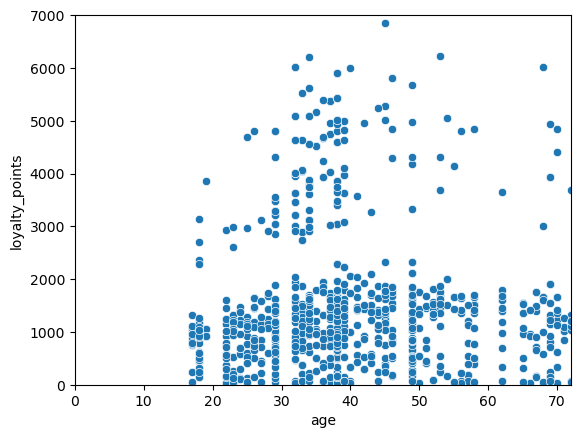

In [58]:
# Start with a visualisation BEFORE running linear regression.
sns.scatterplot(data=reviews,
               x='age',
               y='loyalty_points')

# Set axis values.
plt.ylim(0, 7000)
plt.xlim(0, 72)

In [61]:
# Fit the linear model.
# Polyfit() good to use for simple linear regression (only one variable).
# See if we can predict the loyalty points based on the age 
reg = np.polyfit(reviews['age'],
                reviews['loyalty_points'],
                # Degree = 1, degree of polynomium, for SLR always 1.
                deg = 1)

# View output.
reg

array([  -4.01280515, 1736.5177394 ])

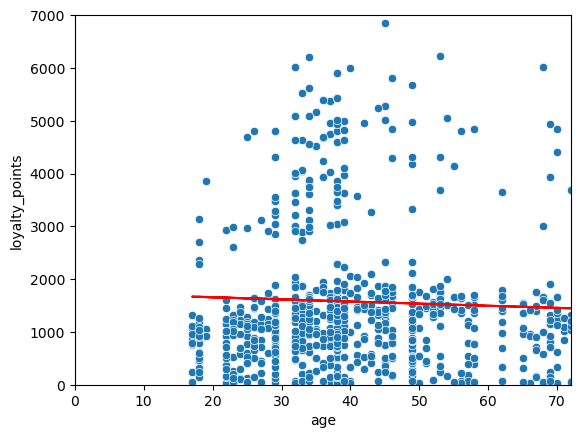

In [63]:
# Add a trendline to visualise the linear regression.
# Use the NumPy polyval method, specify the regression and the independent variable.
trend = np.polyval(reg, reviews['age'])

# View the previous scatterplot.
sns.scatterplot(data=reviews,
               x='age',
               y='loyalty_points')

# Set axis values.
plt.ylim(0, 7000)
plt.xlim(0, 72)

# Add the trendline.
plt.plot(reviews['age'],
         trend,
         color='red')

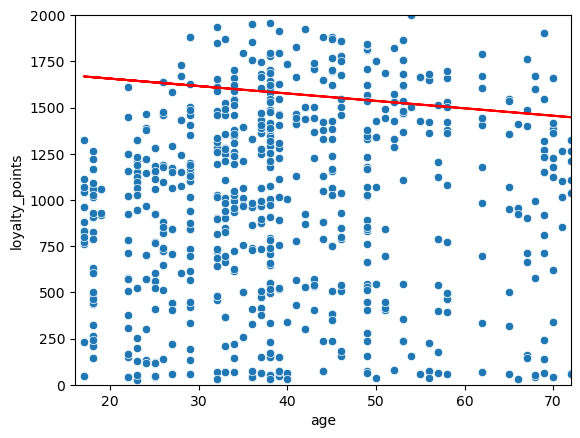

In [64]:
# Add a trendline to visualise the linear regression.
# Use the NumPy polyval method, specify the regression and the independent variable.
trend = np.polyval(reg, reviews['age'])

# View the previous scatterplot.
sns.scatterplot(data=reviews,
               x='age',
               y='loyalty_points')

# Set axis values.
plt.ylim(0, 2000)
plt.xlim(16, 72)

# Add the trendline.
plt.plot(reviews['age'],
         trend,
         color='red')

In [40]:
# Checking for any signs of linearity
# creating the OLS model
# Setting the independent variable
X = reviews[['age']]

# add a constant term to the independent variables
X = sm.add_constant(X)

# create the dependent variable
y = reviews['loyalty_points']

# fit the model
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 05 May 2023   Prob (F-statistic):             0.0577
Time:                        10:11:04   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

In [66]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     105.9
Date:                Mon, 08 May 2023   Prob (F-statistic):           3.12e-24
Time:                        10:24:35   Log-Likelihood:                -9309.2
No. Observations:                2000   AIC:                         1.862e+04
Df Residuals:                    1998   BIC:                         1.863e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.0336      1.750     38.297      0.000      63.601      70.466
x             -0.4313      0.042    -10.290      0.000      -0.513      -0.349
==============================================================================
Omnibus:                      175.505   Durbin-Watson:                   3.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.000
Skew:                          -0.121   Prob(JB):                     1.54e-13
Kurtosis:                       2.194   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    67.033642
x            -0.431286
dtype: float64
Standard errors:  Intercept    1.750378
x            0.041914
dtype: float64
Predicted values:  [59.27049336 57.11406317 57.54534921 ... 52.36991677 52.36991677
 53.23248884]


In [68]:
# Create the linear regression model.
# Set the the coefficient to 1.0143 and the constant to -0.4618.
y_pred = (-67.033642) + -0.431286 * reviews['age']

# View the output.
y_pred

0      -74.796790
1      -76.953220
2      -76.521934
3      -77.815792
4      -81.266080
          ...    
1995   -82.991224
1996   -85.578940
1997   -81.697366
1998   -81.697366
1999   -80.834794
Name: age, Length: 2000, dtype: float64